# Keras iris Modeling

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* 실습용 데이터 설정
 - iris.csv

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')

* pandas DataFrame

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# I. Data Preprocessing

> ## 1) iris.Species 빈도분석

* Species : setosa, virginica, versicolor

In [ ]:
iris.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

> ## 2) DataFrame to Array & Casting

In [ ]:
iris_AR = iris.values

iris_AR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

* object to float

In [ ]:
AR_X = iris_AR[:, 0:4].astype(float)
AR_y = iris_AR[:, 4]

AR_X.shape, AR_y.shape

((150, 4), (150,))

> ## 3) One Hot Encoding with sklearn & Keras

* LabelEncoder( )
 - ['setosa', 'virginica', 'virsicolor'] to [0, 1, 2]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
AR_yLBE = encoder.fit_transform(AR_y)

AR_yLBE

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* One-Hot Encoding - to_categorical( )

In [ ]:
from tensorflow.keras.utils import to_categorical

AR_yOHE = to_categorical(AR_yLBE)

AR_yOHE

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

> ## 4) Version check

* tensorFlow Version

In [ ]:
import tensorflow

tensorflow.__version__

'2.6.0'

* Keras Version

In [ ]:
import keras

keras.__version__

'2.6.0'

> ## 5) train_test_split( )

* 7 : 3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yOHE, 
                                                    test_size = 0.3, 
                                                    random_state = 2045) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

# II. Keras Modeling

> ## 1) Keras models & layers Import

In [ ]:
from tensorflow.keras import models 
from tensorflow.keras import layers

> ## 2) Model Define

* 모델 신경망 구조 정의

In [ ]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

* 모델 구조 확인
 - Layers & Parameters

In [ ]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


* 모델 레이어 시각화

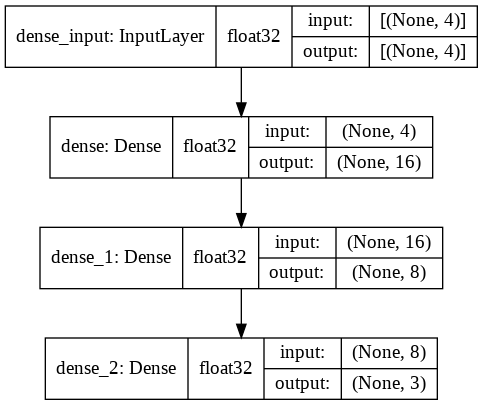

In [ ]:
from tensorflow.keras import utils

utils.plot_model(Model_iris,
                 show_shapes = True,
                 show_dtype = True)

> ## 3) Model Compile

* 모델 학습방법 설정

In [ ]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

> ## 4) Model Fit

* 모델 학습 수행

In [ ]:
History_iris = Model_iris.fit(X_train, y_train,
                              epochs = 500,
                              batch_size = 7,
                              validation_data = (X_test, y_test))

Epoch 1/500
15/15 [==============================] - 1s 25ms/step - loss: 1.0945 - accuracy: 0.4000 - val_loss: 1.1173 - val_accuracy: 0.5333
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0371 - accuracy: 0.3714 - val_loss: 1.0489 - val_accuracy: 0.3111
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9816 - accuracy: 0.3524 - val_loss: 0.9907 - val_accuracy: 0.3333
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9324 - accuracy: 0.5238 - val_loss: 0.9453 - val_accuracy: 0.4000
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8944 - accuracy: 0.6571 - val_loss: 0.8981 - val_accuracy: 0.7333
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.8620 - accuracy: 0.7714 - val_loss: 0.8711 - val_accuracy: 0.8667
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 0.8428 - accuracy: 0.7429 - val_loss: 0.8520 - val_accuracy: 0.8889
Epoch 8/500


> ## 5) 학습 결과 시각화

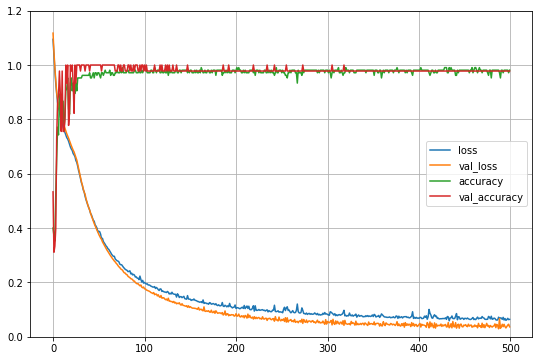

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.ylim(0, 1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = Model_iris.evaluate(X_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.9778
Loss = 0.04
Accuracy = 0.98


> ## 7) Model Predict

* Probability

In [ ]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)

Model_iris.predict(X_test)

array([[0.9859 , 0.00831, 0.00579],
       [0.98078, 0.01248, 0.00673],
       [0.00104, 0.99756, 0.0014 ],
       [0.     , 0.00002, 0.99998],
       [0.9859 , 0.00831, 0.00579],
       [0.00008, 0.99935, 0.00057],
       [0.     , 0.00373, 0.99626],
       [0.9859 , 0.00831, 0.00579],
       [0.     , 0.00022, 0.99978],
       [0.9859 , 0.00831, 0.00579],
       [0.00025, 0.90987, 0.08989],
       [0.     , 0.00146, 0.99854],
       [0.00002, 0.99854, 0.00143],
       [0.9859 , 0.00831, 0.00579],
       [0.9859 , 0.00831, 0.00579],
       [0.00007, 0.99806, 0.00187],
       [0.00004, 0.99033, 0.00962],
       [0.9859 , 0.00831, 0.00579],
       [0.00001, 0.99962, 0.00037],
       [0.9859 , 0.00831, 0.00579],
       [0.9859 , 0.00831, 0.00579],
       [0.9859 , 0.00831, 0.00579],
       [0.     , 0.00042, 0.99958],
       [0.9859 , 0.00831, 0.00579],
       [0.     , 0.03303, 0.96697],
       [0.00004, 0.0071 , 0.99285],
       [0.9859 , 0.00831, 0.00579],
       [0.00001, 0.99853, 0.

* Probability to Class

In [ ]:
y_hat = np.argmax(Model_iris.predict(X_test), axis = 1)

y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

* One-Hot Encoding to Array
 * np.argmax( ) : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
 * axis = 1 : 열기준

In [ ]:
y = np.argmax(y_test, axis = 1)

y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

* Confusion Matrix & Claasification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [ ]:
print(classification_report(y, y_hat, 
                            target_names = ['setosa',
                                            'virginica',
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# III. Model Save & Load

> ## 1) File System

* Save to Colab File System

In [ ]:
!ls -l

In [ ]:
Model_iris.save('Model_iris.h5')

!ls -l

* Download Colab File System to Local File System

In [ ]:
from google.colab import files

files.download('Model_iris.h5')

* Load from Colab File System

In [ ]:
from tensorflow.keras.models import load_model

Model_local = load_model('Model_iris.h5')

In [ ]:
np.argmax(Model_local.predict(X_test), axis = 1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

> ## 2) Google Drive

* Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* Check Mounted_Drive

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

* Save to Mounted Google Drive Directory

In [ ]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34600 Aug 31 00:44 001_Model_iris.h5


* Load from Mounted Google Drive Directory

In [ ]:
from tensorflow.keras.models import load_model

Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [ ]:
np.argmax(Model_google.predict(X_test), axis = 1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

# 
# 
# 
# The End
# 
# 
# 